In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing data

path = r'C:\Users\katro\World Happiness Report'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'whr.csv'))

C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\katro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

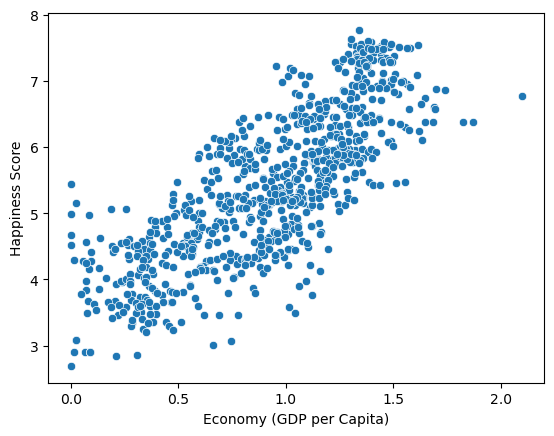

In [4]:
# Creating scatterplots

sns.scatterplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = df)

Hypothesis - The higher the GDP per capita, the higher the happiness score.

In [6]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['Economy (GDP per Capita)'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# Create a regression object.

regression = LinearRegression()

In [14]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

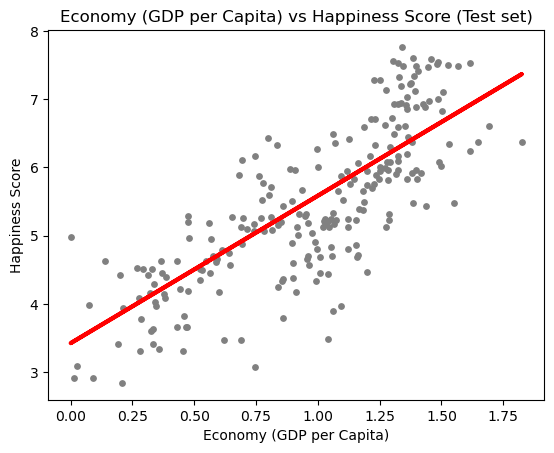

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economy (GDP per Capita) vs Happiness Score (Test set)')
plot_test.xlabel('Economy (GDP per Capita)')
plot_test.ylabel('Happiness Score')
plot_test.show()

The line does fit the data points, but it doesn't seem to be a solid indicator. The plot points are scattered around the line.

In [17]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [18]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.503950724913581
R2 score:  0.6165274246795835


In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


There is a slight difference in the actual score versus the predicted score, but it is still close. This tells me that my hypothesis is correct in that the higher the GDP per Capita is, the higher the Happiness Score will be.